In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
data = yf.download(tickers = ['AAPL'], start = '2012-03-11',end = '2022-07-10')
data.head(10)
print(data.shape)

[*********************100%%**********************]  1 of 1 completed
(2599, 6)


In [2]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

data['Next Close'] = data['Adj Close'].shift(-7)
# target prediction value: the change in closing price next week
data['Target'] = data['Next Close'] - data['Adj Close']

# data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

# target is next week's closing price
# data['TargetNextClose'] = data['Adj Close'].shift(-7)

# Display the resulting DataFrame
data.dropna(inplace=True)

# Resample to weekly frequency and calculate the mean
# df_weekly = data.resample('W').mean()

# Reset index to make 'date' a column again
# df_weekly.reset_index(inplace=True)
# df_weekly.dropna(inplace=True)
# df_weekly.reset_index(inplace = True)

data.reset_index(inplace = True)

# Target column Categories
# data['y'] =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
# data['yi'] = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
# print(len(yi))

data.drop(['Volume', 'Close', 'Date', 'Next Close'], axis=1, inplace=True)
# df_weekly.drop(['index', 'Volume', 'Close'], axis=1, inplace=True)
print(data.shape)
# print(df_weekly.head())

(2443, 9)


In [3]:
data_set = data.iloc[:, 0:9] #.values
pd.set_option('display.max_columns', None)

data_set.head(20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))
# data_set.reset_index(inplace = True, drop=True)
# data_set.head()
# data_set.to_csv('stocks.csv', index=False)

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target
0,23.089287,23.114286,22.432142,19.096916,35.875684,23.552655,22.673908,21.845652,0.180298
1,22.484285,22.692142,22.332144,19.145872,36.765282,23.451416,22.670259,21.854182,-0.497114
2,22.583929,22.683214,22.280357,19.299414,39.582099,23.376995,22.670254,21.864988,-0.545149
3,22.691786,23.225000,22.535713,19.756388,47.096862,23.360785,22.680879,21.882760,-1.223778
4,23.173929,23.313929,23.000000,19.598888,45.028756,23.328499,22.687629,21.897846,-1.234716
5,22.842501,22.930714,22.500000,19.234947,40.613280,23.258574,22.685781,21.907071,-1.134689
6,22.537500,22.563213,21.772142,18.541731,33.841003,23.117758,22.667845,21.905388,-0.404366
7,21.872143,22.692142,21.812857,19.277214,44.383315,23.072631,22.667371,21.915170,-1.740038
8,22.535713,22.639286,21.846430,18.648758,38.732730,22.961496,22.652289,21.915044,-0.873823
9,22.194286,22.376785,21.808571,18.754265,40.104305,22.872748,22.639959,21.916562,-1.033133


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

c:\users\jonat\appdata\local\programs\python\python39\lib\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[[0.05470759 0.05242742 0.05248086 ... 0.04605846 0.03773333 0.52260579]
 [0.05112291 0.04992461 0.05187615 ... 0.04603413 0.03779186 0.50646839]
 [0.0517133  0.04987168 0.05156299 ... 0.0460341  0.037866   0.5053241 ]
 ...
 [0.74682103 0.75674189 0.76204365 ... 0.91842794 0.94932065 0.54806913]
 [0.76341129 0.76610938 0.76930024 ... 0.91686392 0.94813519 0.62907773]
 [0.76003403 0.76569432 0.74722809 ... 0.91477367 0.94658192 0.74504058]]


In [5]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30 # Number of days (or weeks) want to look back
print(data_set_scaled.shape[0])
for j in range(8):
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]): #backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
# make sure the shape is correct
print(X)
print(X.shape)
# print(y)
print(y.shape)


2443
[[[0.05470759 0.05242742 0.05248086 ... 0.05398809 0.04605846 0.03773333]
  [0.05112291 0.04992461 0.05187615 ... 0.05335498 0.04603413 0.03779186]
  [0.0517133  0.04987168 0.05156299 ... 0.05288957 0.0460341  0.037866  ]
  ...
  [0.03730265 0.03552402 0.03703896 ... 0.03403626 0.04067667 0.03556804]
  [0.03792055 0.03650439 0.03833479 ... 0.03406514 0.04048441 0.03546631]
  [0.03976791 0.04031575 0.04073422 ... 0.03447478 0.04038098 0.03542446]]

 [[0.05112291 0.04992461 0.05187615 ... 0.05335498 0.04603413 0.03779186]
  [0.0517133  0.04987168 0.05156299 ... 0.05288957 0.0460341  0.037866  ]
  [0.05235236 0.05308381 0.05310717 ... 0.0527882  0.04610494 0.03798794]
  ...
  [0.03792055 0.03650439 0.03833479 ... 0.03406514 0.04048441 0.03546631]
  [0.03976791 0.04031575 0.04073422 ... 0.03447478 0.04038098 0.03542446]
  [0.04265638 0.04040468 0.04211427 ... 0.03474437 0.04025721 0.03536773]]

 [[0.0517133  0.04987168 0.05156299 ... 0.05288957 0.0460341  0.037866  ]
  [0.05235236 0.0

In [6]:
#also comprehensions for X
#X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
#print(X.shape)

In [7]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

1930
(1930, 30, 8)
(483, 30, 8)
(1930, 1)
(483, 1)


In [8]:
# !pip install --upgrade tensorflow-probability

[Tensorflow probability documentation](https://www.tensorflow.org/probability/examples/Probabilistic_Layers_Regression)

In [16]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed
import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

print(type(X_train))
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

# lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
# inputs = LSTM(150, name='first_layer')(lstm_input)
# inputs = Dense(1, name='dense_layer')(inputs)
# output = Activation('linear', name='output')(inputs)
# model = Model(inputs=lstm_input, outputs=output)
# adam = optimizers.Adam()
# model.compile(optimizer=adam, loss='mse')

negloglik = lambda y, rv_y: -rv_y.log_prob(y)


model = Sequential()
model.add(LSTM(150, name='first_layer', return_sequences=True, input_shape = (backcandles, 8)))
model.add(LSTM(150, name='second_layer'))
model.add(Dense(2, activation='relu')) # 2 as you want to predict mean and variance
model.add(  tfp.layers.DistributionLambda(
      lambda t: tfd.Normal(loc=t[..., :1],
                           scale=1e-3 + tf.math.softplus(0.05 * t[...,1:])))) # note this

model.compile(optimizer='adam', loss=negloglik) # metrics=[keras.metrics.Accuracy()]
model.summary()

<class 'numpy.ndarray'>
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (LSTM)          (None, 30, 150)           95400     
                                                                 
 second_layer (LSTM)         (None, 150)               180600    
                                                                 
 dense_2 (Dense)             (None, 2)                 302       
                                                                 
 distribution_lambda_1 (Dis  ((None, 1),               0         
 tributionLambda)             (None, 1))                         
                                                                 
Total params: 276302 (1.05 MB)
Trainable params: 276302 (1.05 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
# model.fit(x=X_train, y=y_train, batch_size=15, epochs=15, shuffle=True, validation_split = 0.1)
model.fit(x=X_train, y=y_train, batch_size=32, epochs=10, validation_data=(X_test,y_test),verbose=1)

Epoch 1/10
61/61 [==============================] - 12s 95ms/step - loss: 0.5753 - val_loss: 0.5845
Epoch 2/10
61/61 [==============================] - 4s 70ms/step - loss: 0.5568 - val_loss: 0.5833
Epoch 3/10
61/61 [==============================] - 4s 68ms/step - loss: 0.5561 - val_loss: 0.5910
Epoch 4/10
61/61 [==============================] - 4s 72ms/step - loss: 0.5563 - val_loss: 0.5872
Epoch 5/10
61/61 [==============================] - 4s 68ms/step - loss: 0.5562 - val_loss: 0.5955
Epoch 6/10
61/61 [==============================] - 4s 70ms/step - loss: 0.5564 - val_loss: 0.5899
Epoch 7/10
61/61 [==============================] - 4s 67ms/step - loss: 0.5560 - val_loss: 0.5937
Epoch 8/10
61/61 [==============================] - 4s 67ms/step - loss: 0.5562 - val_loss: 0.5956
Epoch 9/10
61/61 [==============================] - 4s 69ms/step - loss: 0.5561 - val_loss: 0.5905
Epoch 10/10
61/61 [==============================] - 4s 66ms/step - loss: 0.5561 - val_loss: 0.5829


In [11]:
# model.evaluate(X_test, y_test)
# # access validation accuracy for each epoch
# model.metrics_names
# # acc = model.history.history['val_accuracy']
# # print(acc)

# # # access validation loss for each epoch
# # loss_val = model.history.history['val_loss']
# # print(loss_val)

<class 'tensorflow.python.framework.ops.EagerTensor'>


Text(0.5, 1.0, 'Tensorflow probability implementation')

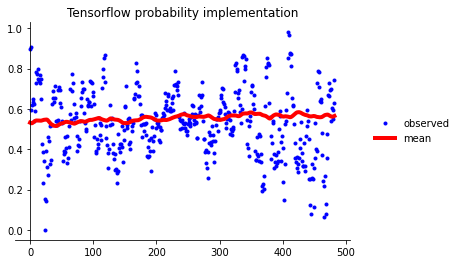

In [19]:
# representing aleatoric uncertainty from tfp documentation
# [print(np.squeeze(w.numpy())) for w in model.weights];
yhat = model(X_test)
assert isinstance(yhat, tfd.Distribution)

plt.plot(np.arange(len(X_test)), y_test, 'b.', label='observed');

m = yhat.mean()
print(type(m))
s = yhat.stddev()

plt.plot(np.arange(len(X_test)), m, 'r', linewidth=4, label='mean');
# confidence interval is extremely wide
# plt.plot(np.arange(len(X_test)), m + 2 * s, 'g', linewidth=2, label=r'mean + 2 stddev');
# plt.plot(np.arange(len(X_test)), m - 2 * s, 'g', linewidth=2, label=r'mean - 2 stddev');

ax=plt.gca();
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['left'].set_smart_bounds(True)
#ax.spines['bottom'].set_smart_bounds(True)
plt.legend(loc='center left', fancybox=True, framealpha=0., bbox_to_anchor=(1.05, 0.5))
plt.title('Tensorflow probability implementation')

In [20]:
# implement a default model that predicts change in price only
model2 = Sequential()
model2.add(LSTM(150, name='first_layer', return_sequences=True, input_shape = (backcandles, 8)))
model2.add(LSTM(150, name='second_layer'))
model2.add(Dense(1, activation='relu'))
model2.compile(optimizer='adam', loss='mse') # metrics=[keras.metrics.Accuracy()]
model2.fit(x=X_train, y=y_train, batch_size=32, epochs=10, validation_data=(X_test,y_test), verbose=1)

Epoch 1/10
61/61 [==============================] - 12s 92ms/step - loss: 0.0135 - val_loss: 0.0282
Epoch 2/10
61/61 [==============================] - 4s 72ms/step - loss: 0.0024 - val_loss: 0.0355
Epoch 3/10
61/61 [==============================] - 4s 72ms/step - loss: 0.0025 - val_loss: 0.0314
Epoch 4/10
61/61 [==============================] - 4s 70ms/step - loss: 0.0022 - val_loss: 0.0349
Epoch 5/10
61/61 [==============================] - 4s 68ms/step - loss: 0.0023 - val_loss: 0.0384
Epoch 6/10
61/61 [==============================] - 4s 70ms/step - loss: 0.0023 - val_loss: 0.0303
Epoch 7/10
61/61 [==============================] - 4s 69ms/step - loss: 0.0021 - val_loss: 0.0388
Epoch 8/10
61/61 [==============================] - 4s 70ms/step - loss: 0.0021 - val_loss: 0.0347
Epoch 9/10
61/61 [==============================] - 4s 70ms/step - loss: 0.0021 - val_loss: 0.0294
Epoch 10/10
61/61 [==============================] - 4s 69ms/step - loss: 0.0022 - val_loss: 0.0442


16/16 [==============================] - 2s 24ms/step
<class 'numpy.ndarray'>


Text(0.5, 1.0, 'Default MSE loss function implementation')

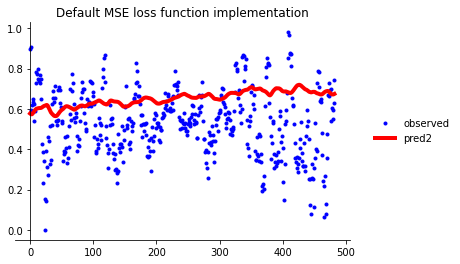

In [21]:
yhat2 = model2.predict(X_test)
print(type(yhat2))
plt.plot(np.arange(len(X_test)), y_test, 'b.', label='observed');
plt.plot(np.arange(len(X_test)), yhat2, 'r', linewidth=4, label='pred2');

ax=plt.gca();
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['left'].set_smart_bounds(True)
#ax.spines['bottom'].set_smart_bounds(True)
plt.legend(loc='center left', fancybox=True, framealpha=0., bbox_to_anchor=(1.05, 0.5))
plt.title("Default MSE loss function implementation")